In [7]:
import subprocess
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
from src.MOEDA import MOEDA
from src import variation

N = 5

L = [5, 10, 20, 15, 30, 60] # number of (discrete) variables
elitsmSettings = [True, False]
populationSizes = [
	[50, 50, 50, 50, 50, 50]
	[150, 500, 500, 500, 500]
]

for i, l in enumerate(L):
	hypervolume_results_per_setting = []
	for j, elitsm in enumerate(elitsmSettings):
		hypervolume_results = []
		for i in range(N):
			populationSize = populationSizes[j][i]
			EA = MOEDA(populationSize = populationSize,
					numberOfVariables = l,
					numberOfEvaluations = 10**4,
					fitnessFunction = 'knapsack',
					selection=variation.selection, variation_model=variation.marginalProductModel, mutation=variation.mutation,
					tournamentSize = 2, mutationProb = 'auto',
					randomSeed = 30,
					elitism=elitsm)
			EA.evolve() # Run algorithm
			hypervolume_results.append(EA.hyperVolumeByGeneration)
		hypervolume_results_per_setting.append(hypervolume_results)
	np.save(('data/hypervolume_results_L_' + str(l) + '.npy'), hypervolume_results_per_setting)

#sizes of EA.hyperVolumeByGeneration and EA.numberOfEvaluationsByGeneration are equal
print('hypervolumes:', EA.hyperVolumeByGeneration) #print array of hypervolumes
print('#feval:', EA.numberOfEvaluationsByGeneration) #print array of #feval

 99%|█████████▉| 99/100 [00:22<00:00,  4.45it/s]

hypervolumes: [0.354351385893442, 0.36544252735841537, 0.3660176531671859, 0.366420041536864, 0.3667155922997044, 0.3676791277258568, 0.37065859892962705, 0.3709801102324468, 0.37111091141464986, 0.37122573687994254, 0.37130262001757347, 0.3713275820752457, 0.37136352743829387, 0.37142743030593506, 0.3714424075405384, 0.37147435897435904, 0.37157121175812774, 0.37162013739116545, 0.3724189232366803, 0.37243989136512506, 0.37246585190510423, 0.3822170301142264, 0.38222901190190917, 0.38255252016934255, 0.3825694943685597, 0.3826114306254492, 0.3826673456346353, 0.3828780254013898, 0.38291496924674484, 0.3829309449636552, 0.3829539100567137, 0.3829808690789998, 0.38300583113667214, 0.3830697340043134, 0.3831256490134993, 0.38311865963735103, 0.382867042096014, 0.3824846233724739, 0.3821710999281093, 0.38216510903426804, 0.38242271746944656, 0.3826014458023804, 0.3824916127486222, 0.3824656522086429, 0.3823388449556673, 0.38197639587826504, 0.38212816518891285, 0.3822360012780574, 0.38226

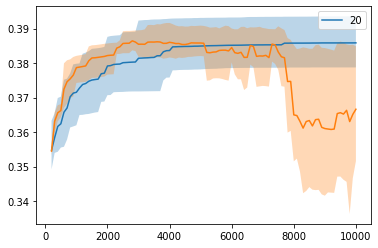

In [9]:
domain = EA.numberOfEvaluationsByGeneration
for i in range(len(hypervolume_results_per_setting)):
	res = hypervolume_results_per_setting[i]
	interdecile_range_low = np.percentile(res, 10, axis=0)
	interdecile_range_high = np.percentile(res, 90, axis=0)

	average = np.average(res, axis=0)

	plt.plot(domain, average)
	plt.fill_between(domain,
		interdecile_range_low,
		interdecile_range_high,
					alpha=0.3)
plt.legend(L) # [("l = " + x) for x in L]
plt.show()